19127216 - Đặng Hoàn Mỹ

### Import the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz

### Load the data and encode the variables

In [2]:
dataset = pd.read_csv('mushrooms.csv')

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [4]:
lEncoder = LabelEncoder()
for column in dataset.columns:
    dataset[column] = lEncoder.fit_transform(dataset[column])

### Split feature and label

In [5]:
feature = dataset.drop(['class'], axis=1)
label = dataset['class']

In [6]:
list_col = list(dataset.columns[1:])

### Initialize the model with different training/ testing set

In [7]:
def buildingModel(test_size):
    classifier = DecisionTreeClassifier(criterion='entropy')
    feature_train, feature_test, label_train, label_test = train_test_split(feature, label, test_size = test_size, random_state=42)
    classifier = classifier.fit(feature_train, label_train)
    label_pred = classifier.predict(feature_test)
    return classifier, feature_test, label_test, label_pred

def classificationReport(label_test, label_pred):
    print('Decision Tree Classification Report \n', classification_report(label_test, label_pred))
    
def plotConfusionMatrix(classifier, feature_test, label_test):
    print('Confusion Matrix')
    plot_confusion_matrix(classifier, feature_test, label_test)
    plt.show()
    
def accuracyScore(label_test, label_pred):
    print('Accuracy Score:', accuracy_score(label_test, label_pred))
    
def plot_Tree(classifier):
    print('Decision Tree')
    dot_data = export_graphviz(classifier, out_file=None, feature_names=list(list_col),
                           class_names='class',
                           filled=True, rounded=True,
                           special_characters=True)
    return graphviz.Source(dot_data)

def modeling(testSize):
    model, feature_test, label_test, label_pred = buildingModel(testSize)
    print(f'(train/ test) {(1 - testSize) * 100}/ {testSize * 100}')
    classificationReport(label_test, label_pred)
    plotConfusionMatrix(model, feature_test, label_test)
    return model

### (train/ test) 40/ 60

(train/ test) 40.0/ 60.0
Decision Tree Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2496
           1       1.00      1.00      1.00      2379

    accuracy                           1.00      4875
   macro avg       1.00      1.00      1.00      4875
weighted avg       1.00      1.00      1.00      4875

Confusion Matrix


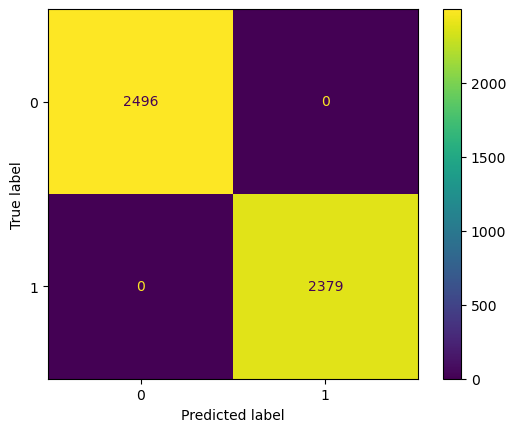

Decision Tree


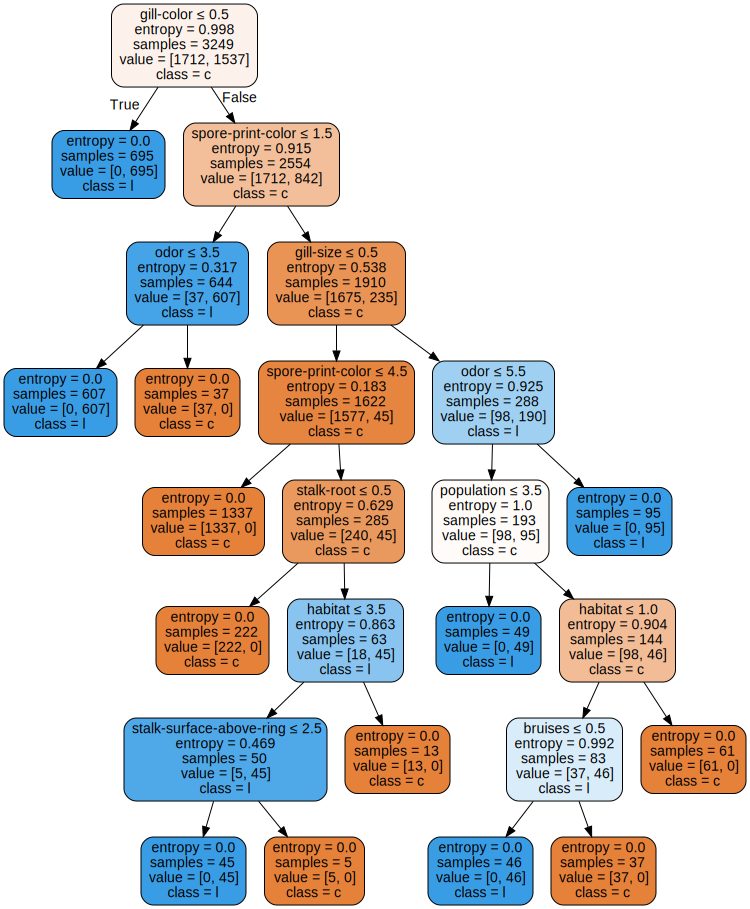

In [8]:
plot_Tree(modeling(0.6))

### (train/ test) 60/ 40

(train/ test) 60.0/ 40.0
Decision Tree Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1678
           1       1.00      1.00      1.00      1572

    accuracy                           1.00      3250
   macro avg       1.00      1.00      1.00      3250
weighted avg       1.00      1.00      1.00      3250

Confusion Matrix


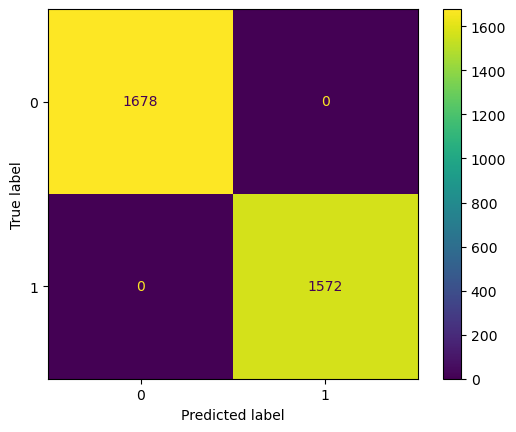

Decision Tree


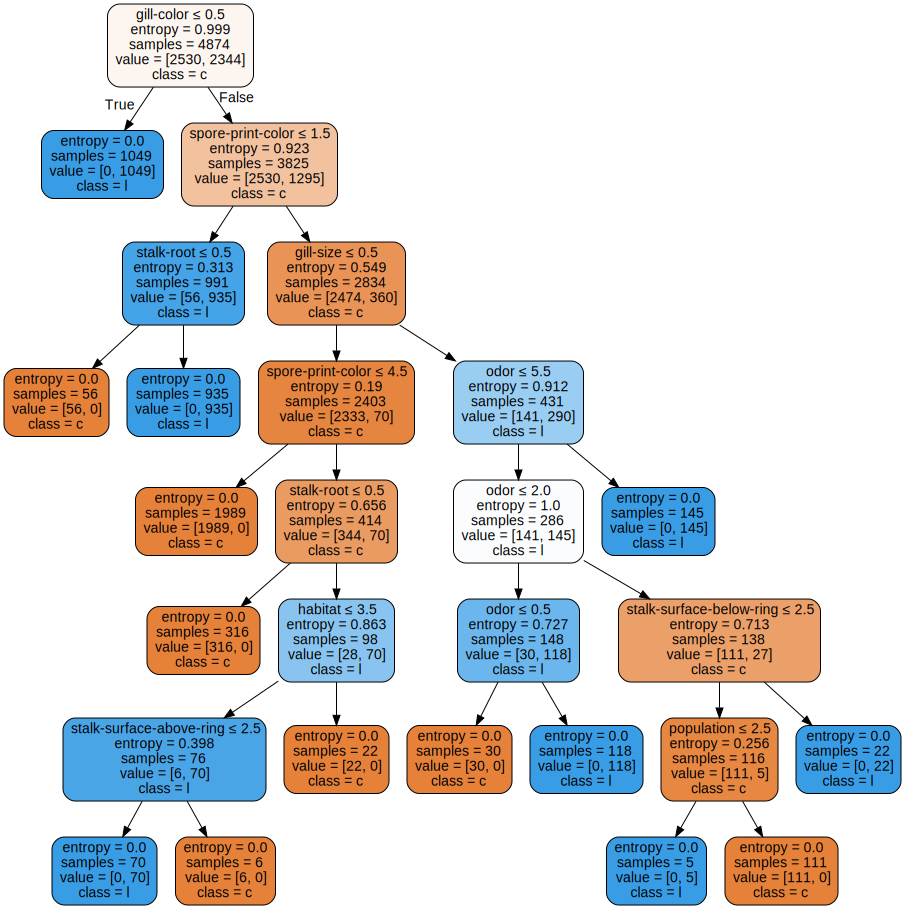

In [9]:
plot_Tree(modeling(0.4))

### (train/ test) 80/ 20

(train/ test) 80.0/ 20.0
Decision Tree Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Confusion Matrix


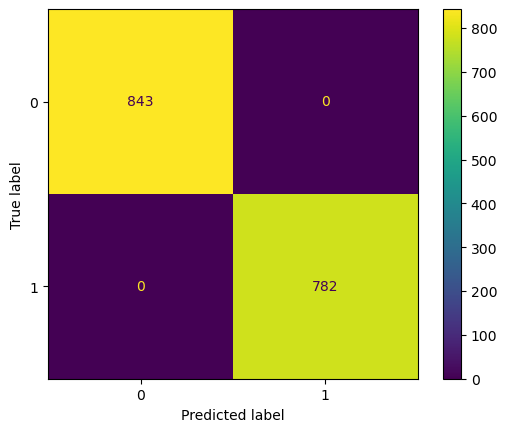

Decision Tree


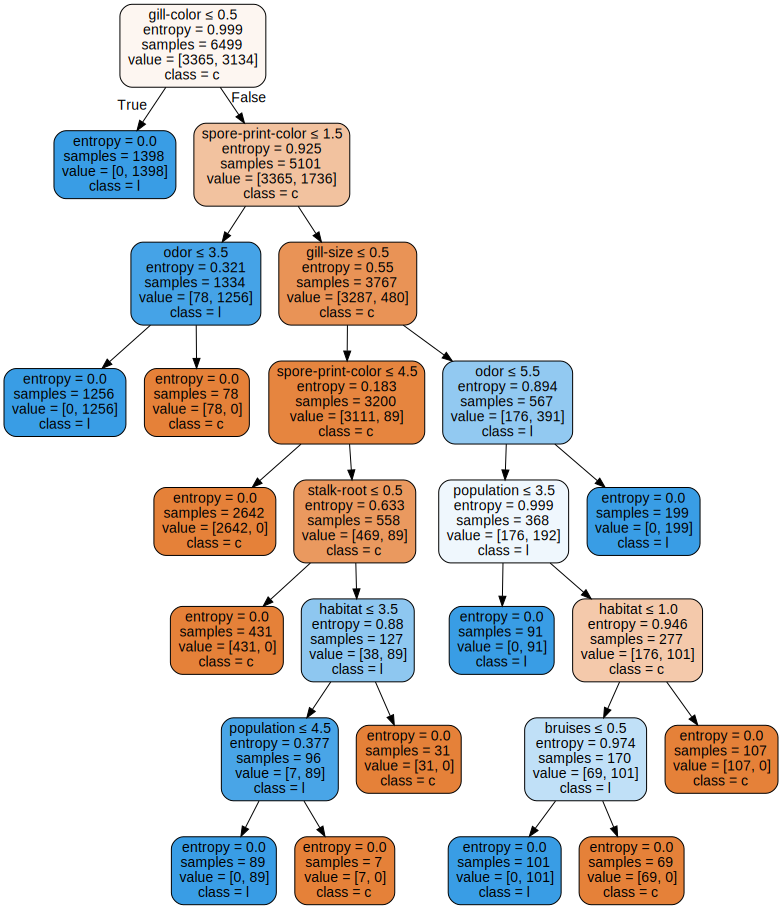

In [10]:
plot_Tree(modeling(0.2))

### (train/ test) 90/ 10

(train/ test) 90.0/ 10.0
Decision Tree Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       433
           1       1.00      1.00      1.00       380

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813

Confusion Matrix


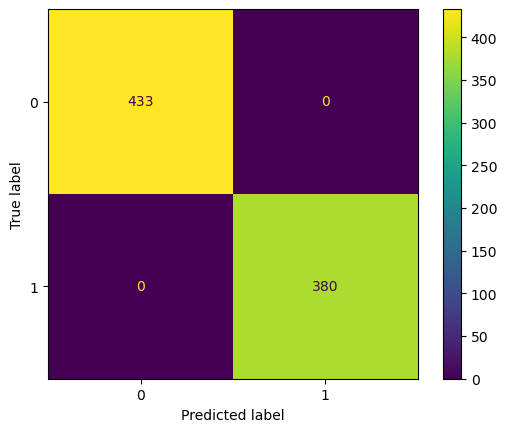

Decision Tree


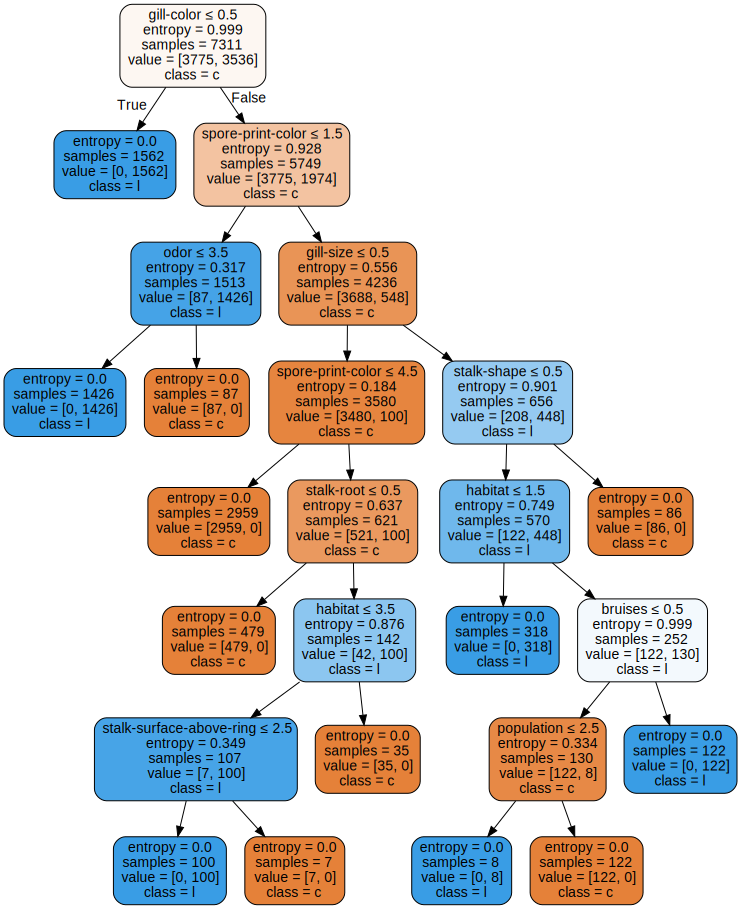

In [11]:
plot_Tree(modeling(0.1))

### Initialize functions for models having max_depth

In [12]:
acc_test_arr = []
acc_train_arr = []

def buildingModel_MaxDepth(maxDepth):
    classifier = DecisionTreeClassifier(criterion='entropy', max_depth= maxDepth)
    feature_train, feature_test, label_train, label_test = train_test_split(feature, label, test_size = 0.2)
    classifier = classifier.fit(feature_train, label_train)
    label_pred = classifier.predict(feature_train)
    acc_train_arr.append(accuracy_score(label_train, label_pred))
    label_pred = classifier.predict(feature_test)
    acc_test_arr.append(accuracy_score(label_test, label_pred))
    return classifier, feature_test, label_test, label_pred

def modeling_MaxDepth(maxDepth):
    model, feature_test, label_test, label_pred = buildingModel_MaxDepth(maxDepth)
    print(f'Max Depth: {maxDepth}')
    accuracyScore(label_test, label_pred)
    classificationReport(label_test, label_pred)
    plotConfusionMatrix(model, feature_test, label_test)
    return model

### Max Depth: None

Max Depth: None
Accuracy Score: 1.0
Decision Tree Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       828
           1       1.00      1.00      1.00       797

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Confusion Matrix


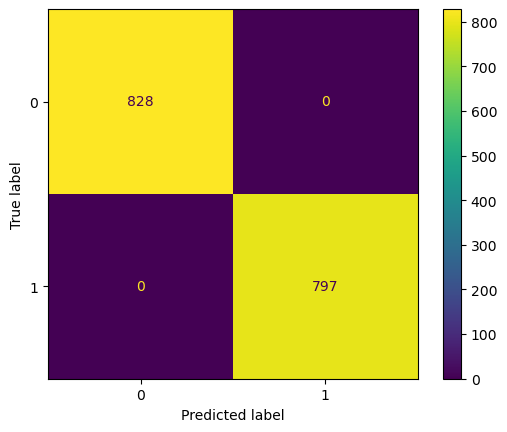

Decision Tree


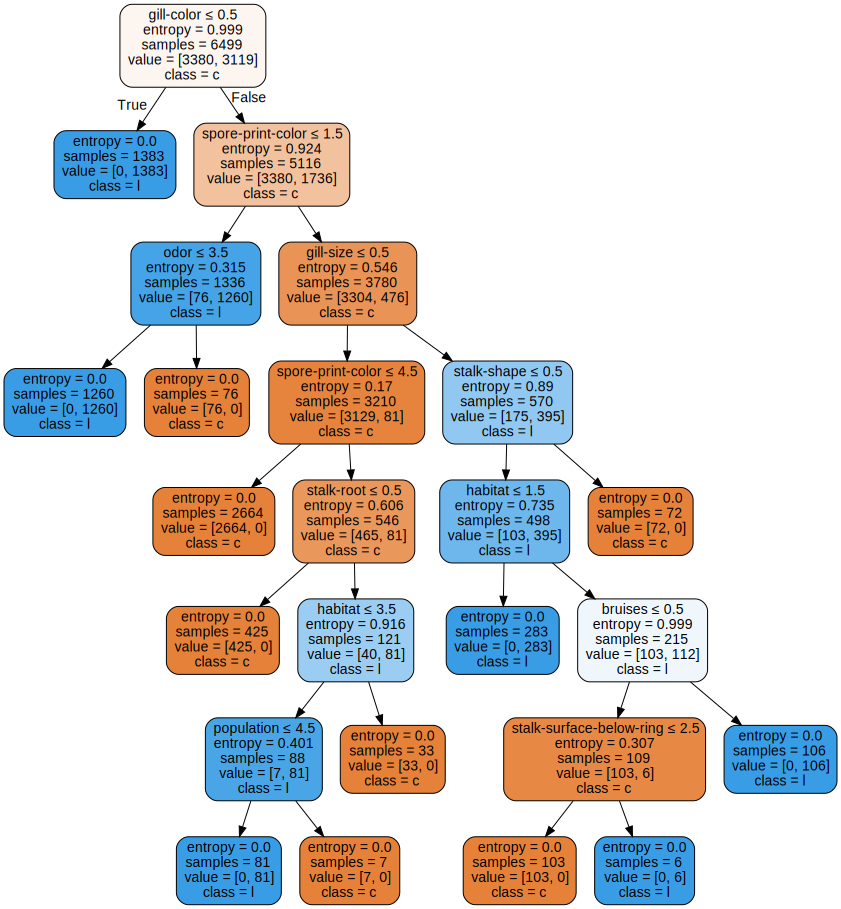

In [13]:
plot_Tree(modeling_MaxDepth(None))

### Max Depth: 2

Max Depth: 2
Accuracy Score: 0.9046153846153846
Decision Tree Classification Report 
               precision    recall  f1-score   support

           0       0.86      0.98      0.91       825
           1       0.97      0.83      0.90       800

    accuracy                           0.90      1625
   macro avg       0.91      0.90      0.90      1625
weighted avg       0.91      0.90      0.90      1625

Confusion Matrix


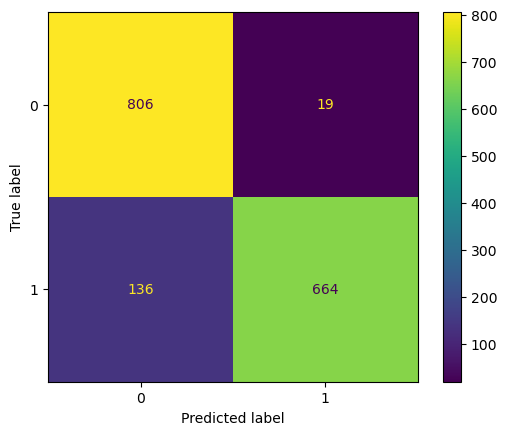

Decision Tree


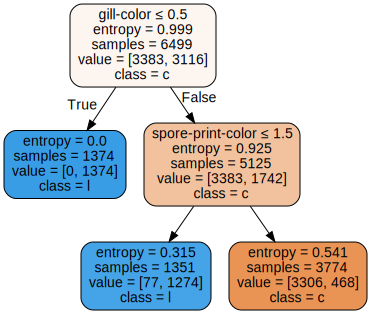

In [14]:
plot_Tree(modeling_MaxDepth(2))

### Max Depth: 3

Max Depth: 3
Accuracy Score: 0.9593846153846154
Decision Tree Classification Report 
               precision    recall  f1-score   support

           0       0.97      0.95      0.96       828
           1       0.95      0.97      0.96       797

    accuracy                           0.96      1625
   macro avg       0.96      0.96      0.96      1625
weighted avg       0.96      0.96      0.96      1625

Confusion Matrix


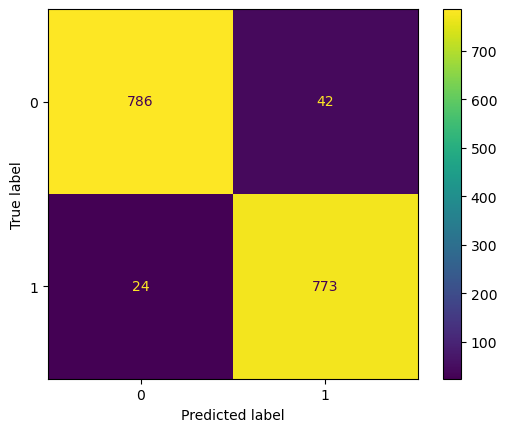

Decision Tree


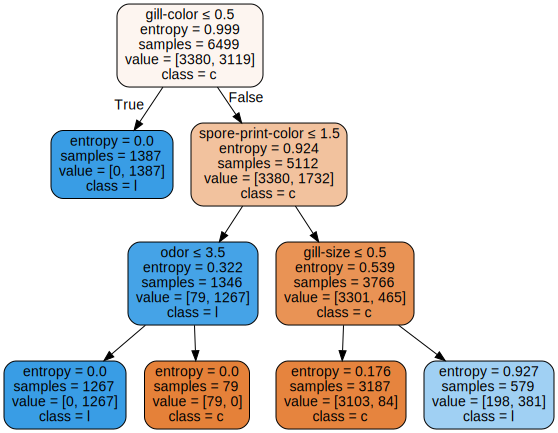

In [15]:
plot_Tree(modeling_MaxDepth(3))

### Max Depth: 4

Max Depth: 4
Accuracy Score: 0.96
Decision Tree Classification Report 
               precision    recall  f1-score   support

           0       0.98      0.94      0.96       838
           1       0.94      0.98      0.96       787

    accuracy                           0.96      1625
   macro avg       0.96      0.96      0.96      1625
weighted avg       0.96      0.96      0.96      1625

Confusion Matrix


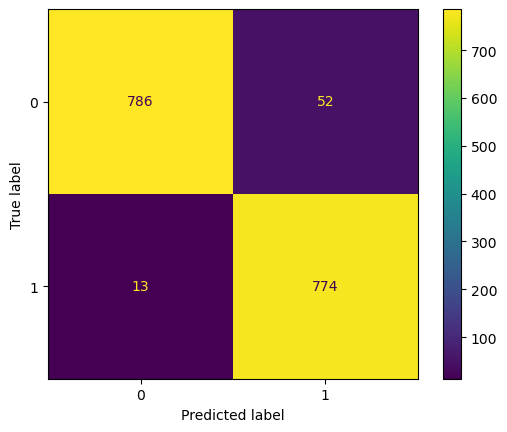

Decision Tree


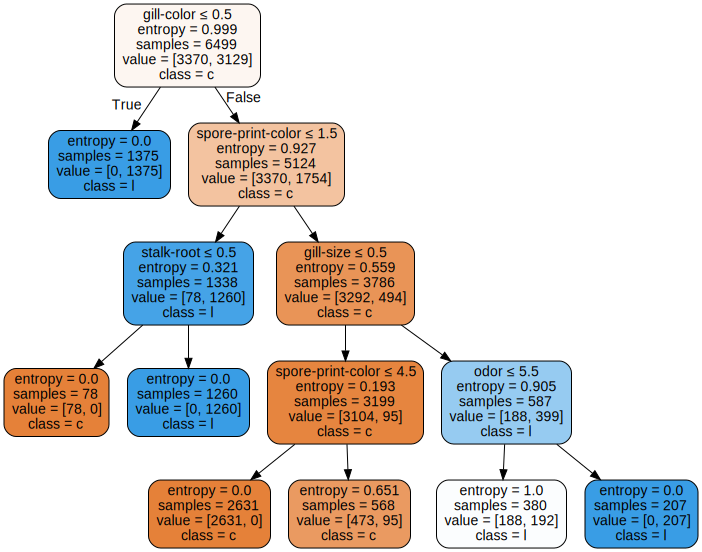

In [16]:
plot_Tree(modeling_MaxDepth(4))

### Max Depth: 5

Max Depth: 5
Accuracy Score: 0.9815384615384616
Decision Tree Classification Report 
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       845
           1       0.97      0.99      0.98       780

    accuracy                           0.98      1625
   macro avg       0.98      0.98      0.98      1625
weighted avg       0.98      0.98      0.98      1625

Confusion Matrix


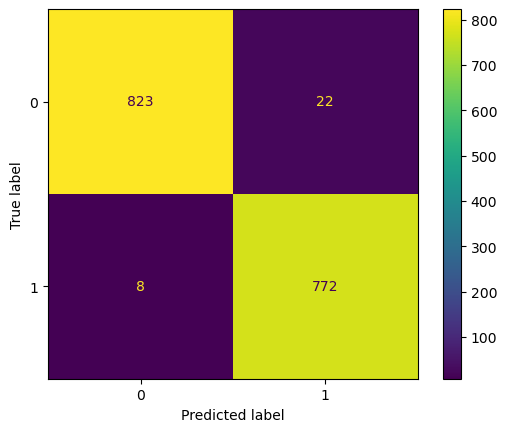

Decision Tree


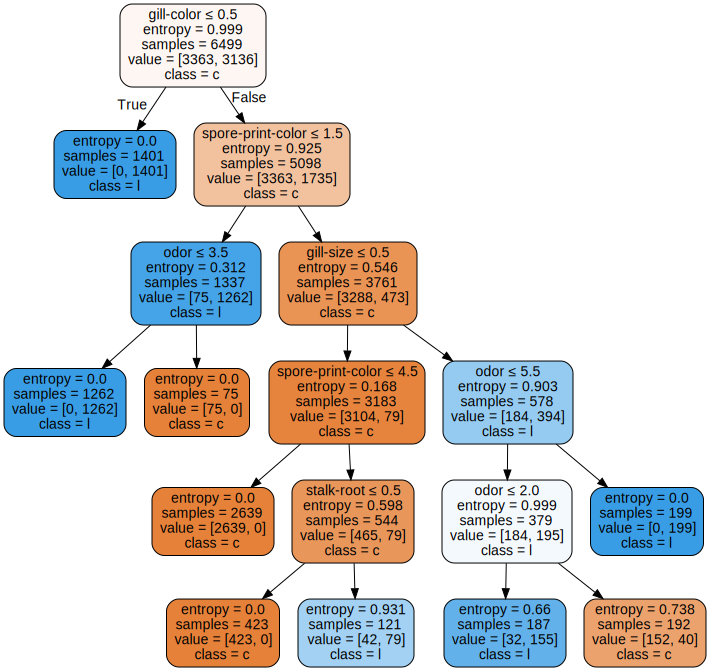

In [17]:
plot_Tree(modeling_MaxDepth(5))

### Max Depth: 6

Max Depth: 6
Accuracy Score: 0.9895384615384616
Decision Tree Classification Report 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       837
           1       0.98      1.00      0.99       788

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625

Confusion Matrix


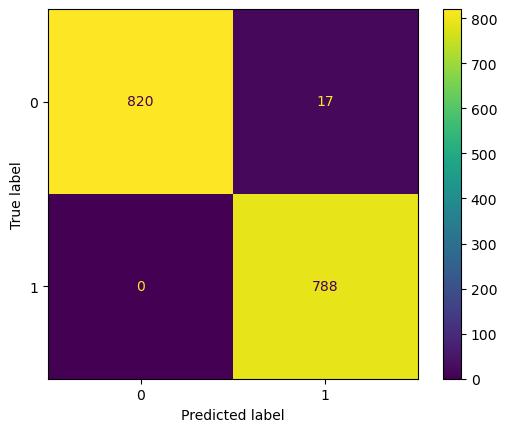

Decision Tree


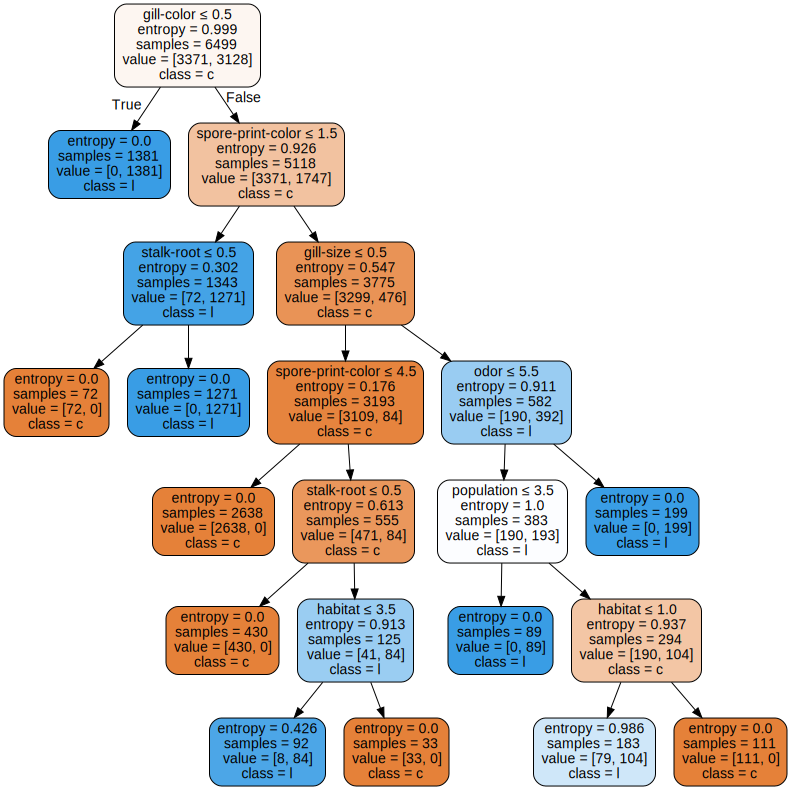

In [18]:
plot_Tree(modeling_MaxDepth(6))

### Max Depth: 7

Max Depth: 7
Accuracy Score: 1.0
Decision Tree Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       859
           1       1.00      1.00      1.00       766

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Confusion Matrix


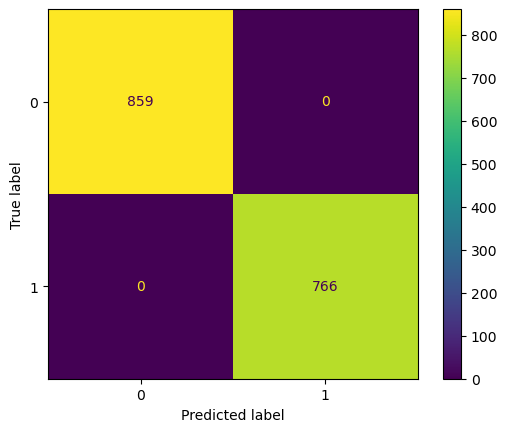

Decision Tree


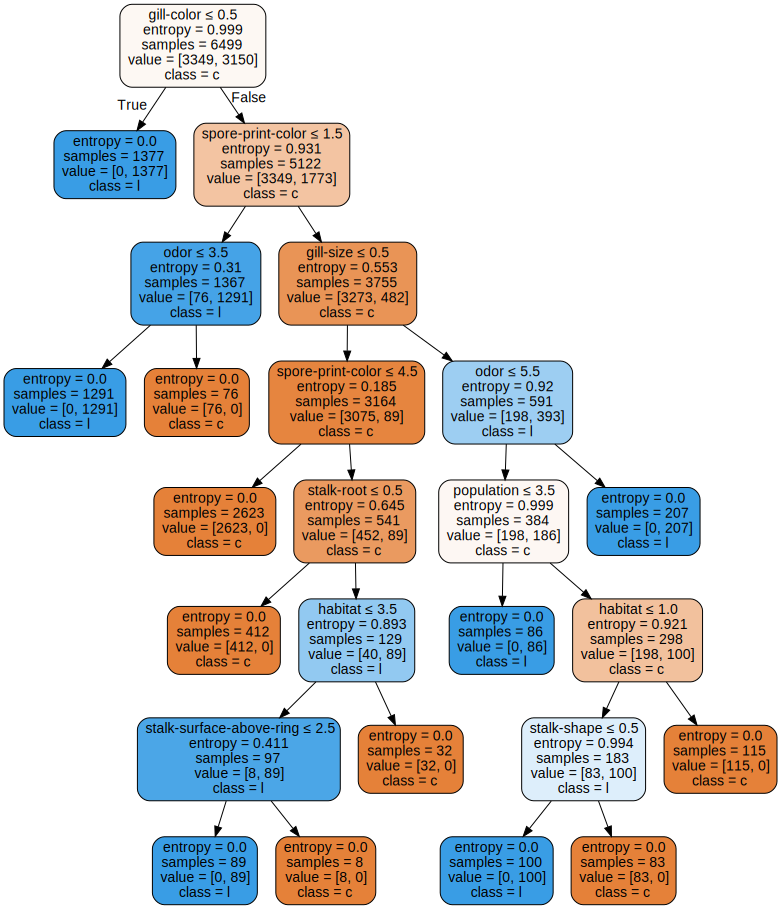

In [19]:
plot_Tree(modeling_MaxDepth(7))

### Training and testing accuracy_score

For train set:
[1.0, 0.9161409447607324, 0.9566087090321588, 0.9564548392060317, 0.982458839821511, 0.9866133251269426, 1.0]
For test set:
[1.0, 0.9046153846153846, 0.9593846153846154, 0.96, 0.9815384615384616, 0.9895384615384616, 1.0]


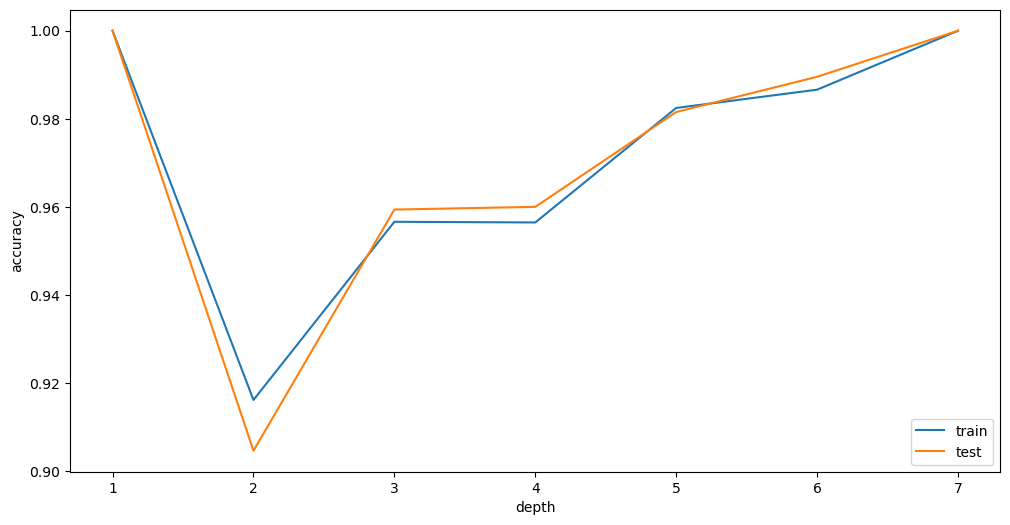

In [20]:
fig, ax = plt.subplots(figsize=(12, 6))
print('For train set:')
print(acc_train_arr)
print('For test set:')
print(acc_test_arr)
ax.set_xlabel('depth')
ax.set_ylabel('accuracy')
ax.plot(range(1, 8), acc_train_arr)
ax.plot(range(1, 8), acc_test_arr)
plt.legend(["train", "test"], loc ="lower right")
plt.show()